In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data = data[data["Embarked"].isna()==False]

In [5]:
data.drop(["PassengerId" , "Ticket" , "Name"] , axis = 1  , inplace = True)

In [6]:
data["Sex"] = (data["Sex"]=="male").astype(int)

In [7]:
data[data["Cabin"].isna() == False]["Cabin"].str.split(' ').str.get(0).str.get(0).value_counts()

Cabin
C    59
B    45
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [8]:
data["Cabin_Type"] = data["Cabin"].str.split(' ').str.get(0).str.get(0)

In [9]:
data["Cno"] = data["Cabin"].str.split(' ').str.get(0).str[1:]

In [10]:
data.drop(["Cabin"] , axis=1 , inplace  = True)

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Type,Cno
0,0,3,1,22.0,1,0,7.2500,S,NaN,NaN
1,1,1,0,38.0,1,0,71.2833,C,C,85
2,1,3,0,26.0,0,0,7.9250,S,NaN,NaN
3,1,1,0,35.0,1,0,53.1000,S,C,123
4,0,3,1,35.0,0,0,8.0500,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,NaN,NaN
887,1,1,0,19.0,0,0,30.0000,S,B,42
888,0,3,0,NaN,1,2,23.4500,S,NaN,NaN
889,1,1,1,26.0,0,0,30.0000,C,C,148


In [12]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='Count'>

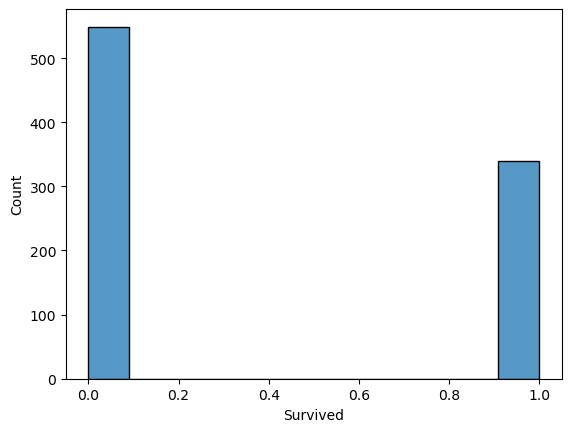

In [13]:
sns.histplot(data["Survived"])

In [14]:
data["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

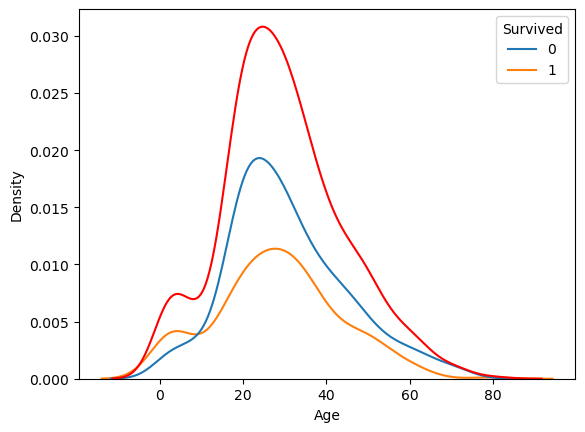

In [15]:
sns.kdeplot(data = data , x = "Age" , hue = "Survived")
sns.kdeplot(data["Age"] , color="red")

<Axes: xlabel='Age', ylabel='Count'>

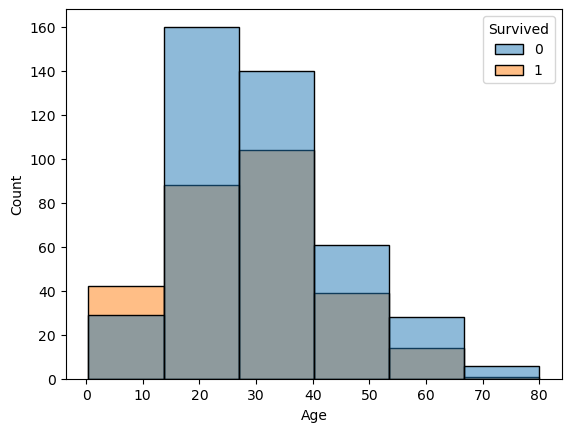

In [16]:
sns.histplot(data=data , bins = 6 , x = "Age" , hue = "Survived")

In [17]:
data[data["Age"]>=65]["Survived"].value_counts()

Survived
0    10
1     1
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

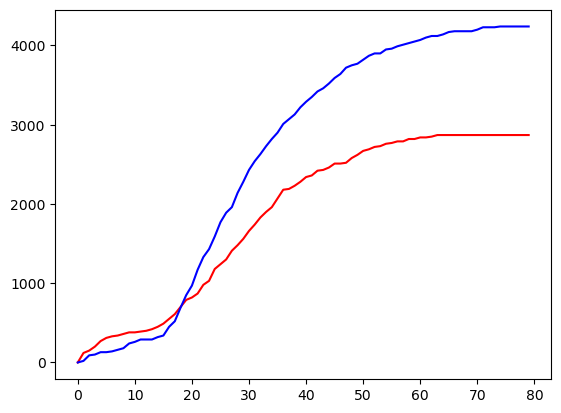

In [19]:
plt.plot([data[(data["Age"]<=x) & (data["Survived"]==True)].size for x in range(80)] , color = "r")
plt.plot([data[(data["Age"]<=x) & (data["Survived"]==False)].size for x in range(80)] , color = "b")

In [20]:
data[(data["Age"]<=10)]["Survived"].value_counts()

Survived
1    38
0    26
Name: count, dtype: int64

In [21]:
38/26

1.4615384615384615

In [22]:
61/52

1.1730769230769231

In [23]:
data["Below 10"] = (data["Age"]<=10).astype(int)
data["Above 65"] = (data["Age"]>=65).astype(int)

In [24]:
data.drop(["Age"] , axis = 1 , inplace = True)

In [25]:
data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_Type,Cno,Below 10,Above 65
0,0,3,1,1,0,7.2500,S,NaN,NaN,0,0
1,1,1,0,1,0,71.2833,C,C,85,0,0
2,1,3,0,0,0,7.9250,S,NaN,NaN,0,0
3,1,1,0,1,0,53.1000,S,C,123,0,0
4,0,3,1,0,0,8.0500,S,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,S,NaN,NaN,0,0
887,1,1,0,0,0,30.0000,S,B,42,0,0
888,0,3,0,1,2,23.4500,S,NaN,NaN,0,0
889,1,1,1,0,0,30.0000,C,C,148,0,0


<Axes: xlabel='Fare', ylabel='Density'>

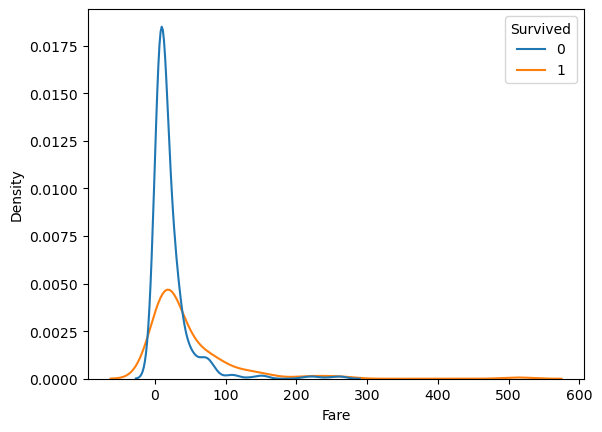

In [26]:
sns.kdeplot(data = data , x = "Fare" , hue = "Survived")

In [27]:
data[data["Fare"]<=8]["Survived"].value_counts()

Survived
0    189
1     52
Name: count, dtype: int64

In [28]:
data["Fare"].max()

512.3292

In [29]:
std = data["Fare"].std()
data["Fare2"] = (data["Fare"]-data["Fare"].mean())/std

In [30]:
data.drop("Fare"  , axis = 1 , inplace = True)

In [31]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Type,Cno,Below 10,Above 65,Fare2
0,0,3,1,1,0,S,NaN,NaN,0,0,-0.499958
1,1,1,0,1,0,C,C,85,0,0,0.788503
2,1,3,0,0,0,S,NaN,NaN,0,0,-0.486376
3,1,1,0,1,0,S,C,123,0,0,0.422623
4,0,3,1,0,0,S,NaN,NaN,0,0,-0.483861
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,S,NaN,NaN,0,0,-0.384258
887,1,1,0,0,0,S,B,42,0,0,-0.042189
888,0,3,0,1,2,S,NaN,NaN,0,0,-0.173986
889,1,1,1,0,0,C,C,148,0,0,-0.042189


<Axes: xlabel='Embarked', ylabel='count'>

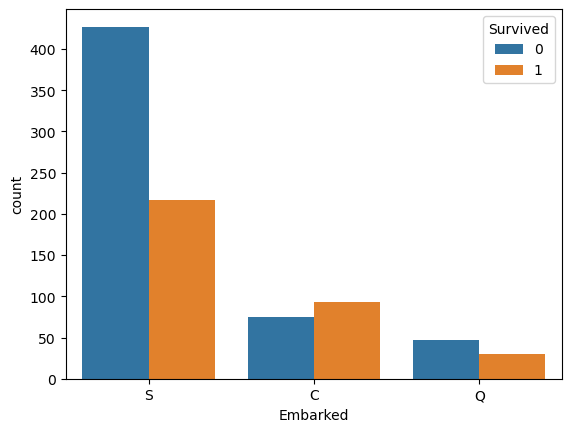

In [32]:
sns.countplot(data = data , x="Embarked" , hue = "Survived")

In [33]:
data.groupby("Embarked")["Survived"].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [34]:
data["Embarked_C"] = (data["Embarked"]=="C").astype(int)
data["Embarked_Q"] = (data["Embarked"]=="Q").astype(int)

In [35]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Type,Cno,Below 10,Above 65,Fare2,Embarked_C,Embarked_Q
0,0,3,1,1,0,S,NaN,NaN,0,0,-0.499958,0,0
1,1,1,0,1,0,C,C,85,0,0,0.788503,1,0
2,1,3,0,0,0,S,NaN,NaN,0,0,-0.486376,0,0
3,1,1,0,1,0,S,C,123,0,0,0.422623,0,0
4,0,3,1,0,0,S,NaN,NaN,0,0,-0.483861,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,S,NaN,NaN,0,0,-0.384258,0,0
887,1,1,0,0,0,S,B,42,0,0,-0.042189,0,0
888,0,3,0,1,2,S,NaN,NaN,0,0,-0.173986,0,0
889,1,1,1,0,0,C,C,148,0,0,-0.042189,1,0


In [36]:
data.drop(["Embarked"] , axis = 1 , inplace = True)

In [37]:
data

,Survived,Pclass,Sex,SibSp,Parch,Cabin_Type,Cno,Below 10,Above 65,Fare2,Embarked_C,Embarked_Q
0,0,3,1,1,0,NaN,NaN,0,0,-0.499958,0,0
1,1,1,0,1,0,C,85,0,0,0.788503,1,0
2,1,3,0,0,0,NaN,NaN,0,0,-0.486376,0,0
3,1,1,0,1,0,C,123,0,0,0.422623,0,0
4,0,3,1,0,0,NaN,NaN,0,0,-0.483861,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,NaN,NaN,0,0,-0.384258,0,0
887,1,1,0,0,0,B,42,0,0,-0.042189,0,0
888,0,3,0,1,2,NaN,NaN,0,0,-0.173986,0,0
889,1,1,1,0,0,C,148,0,0,-0.042189,1,0


In [38]:
data["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [39]:
549/340

1.6147058823529412

In [40]:
data[(data["Embarked_Q"]==0) & (data["Embarked_C"]==0)]["Survived"].value_counts()

Survived
0    427
1    217
Name: count, dtype: int64

In [41]:
data["Embarked_S"] = (data["Embarked_Q"] & data["Embarked_C"]).astype(int)


In [42]:
data

,Survived,Pclass,Sex,SibSp,Parch,Cabin_Type,Cno,Below 10,Above 65,Fare2,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,NaN,NaN,0,0,-0.499958,0,0,0
1,1,1,0,1,0,C,85,0,0,0.788503,1,0,0
2,1,3,0,0,0,NaN,NaN,0,0,-0.486376,0,0,0
3,1,1,0,1,0,C,123,0,0,0.422623,0,0,0
4,0,3,1,0,0,NaN,NaN,0,0,-0.483861,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,NaN,NaN,0,0,-0.384258,0,0,0
887,1,1,0,0,0,B,42,0,0,-0.042189,0,0,0
888,0,3,0,1,2,NaN,NaN,0,0,-0.173986,0,0,0
889,1,1,1,0,0,C,148,0,0,-0.042189,1,0,0


In [43]:
data.drop("Embarked_Q" , axis = 1 , inplace = True)

In [44]:
data

,Survived,Pclass,Sex,SibSp,Parch,Cabin_Type,Cno,Below 10,Above 65,Fare2,Embarked_C,Embarked_S
0,0,3,1,1,0,NaN,NaN,0,0,-0.499958,0,0
1,1,1,0,1,0,C,85,0,0,0.788503,1,0
2,1,3,0,0,0,NaN,NaN,0,0,-0.486376,0,0
3,1,1,0,1,0,C,123,0,0,0.422623,0,0
4,0,3,1,0,0,NaN,NaN,0,0,-0.483861,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,NaN,NaN,0,0,-0.384258,0,0
887,1,1,0,0,0,B,42,0,0,-0.042189,0,0
888,0,3,0,1,2,NaN,NaN,0,0,-0.173986,0,0
889,1,1,1,0,0,C,148,0,0,-0.042189,1,0


<Axes: xlabel='Cabin_Type', ylabel='count'>

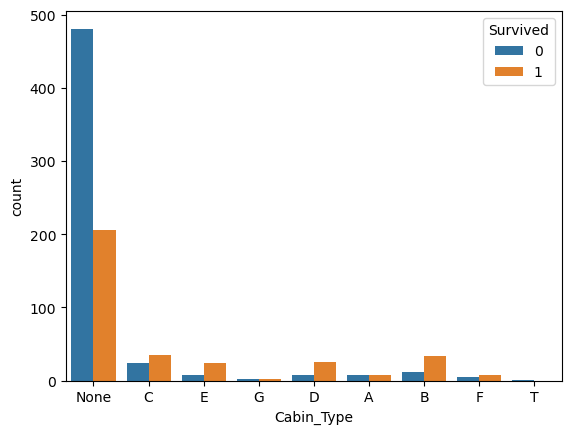

In [45]:
sns.countplot(data = data.fillna("None") , x = "Cabin_Type" , hue = "Survived")

In [52]:
data["Cabin_Type"] = (data["Cabin_Type"].isna()).astype(int)

In [53]:
data["Cabin_Type"].value_counts()

Cabin_Type
1    687
0    202
Name: count, dtype: int64

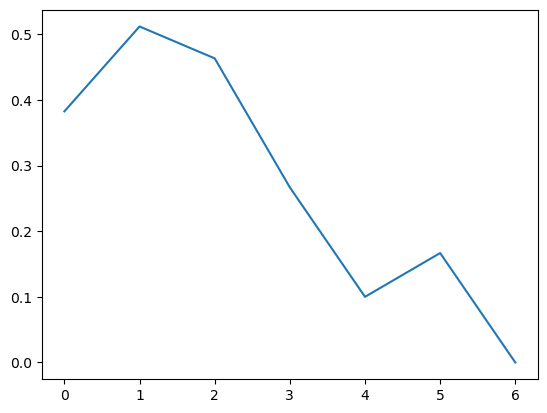

In [54]:
plt.plot([0,1,2,3,4,5,6] , [data[data["Parch"]>=x]["Survived"].mean() for x in [0,1,2,3,4,5,6]])

In [55]:
data["Parch"].clip(upper=3 , inplace=True)

C:\Users\aditya\AppData\Local\Temp\ipykernel_14888\2203255983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Parch"].clip(upper=3 , inplace=True)


<Axes: xlabel='Parch', ylabel='count'>

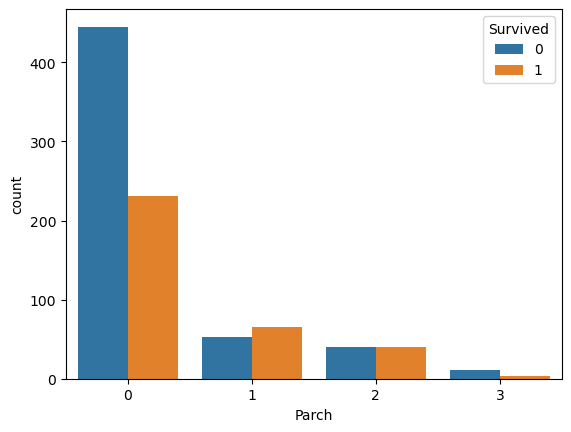

In [56]:
sns.countplot(data=data , x = "Parch" , hue = "Survived")

<Axes: xlabel='Pclass', ylabel='count'>

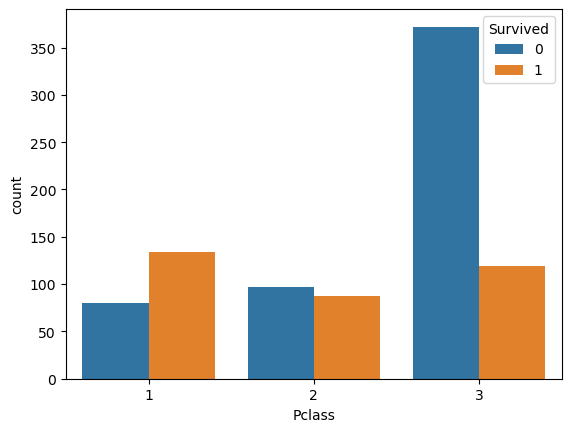

In [57]:
sns.countplot(data = data , x = "Pclass" , hue = "Survived")

In [58]:
data.to_csv("training_final.csv" , index = False)

In [59]:
data

,Survived,Pclass,Sex,SibSp,Parch,Cabin_Type,Cno,Below 10,Above 65,Fare2,Embarked_C,Embarked_S
0,0,3,1,1,0,1,NaN,0,0,-0.499958,0,0
1,1,1,0,1,0,0,85,0,0,0.788503,1,0
2,1,3,0,0,0,1,NaN,0,0,-0.486376,0,0
3,1,1,0,1,0,0,123,0,0,0.422623,0,0
4,0,3,1,0,0,1,NaN,0,0,-0.483861,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,1,NaN,0,0,-0.384258,0,0
887,1,1,0,0,0,0,42,0,0,-0.042189,0,0
888,0,3,0,1,2,1,NaN,0,0,-0.173986,0,0
889,1,1,1,0,0,0,148,0,0,-0.042189,1,0


In [60]:
data["Cabin_Type"].value_counts()

Cabin_Type
1    687
0    202
Name: count, dtype: int64

In [4]:
import pandas as pd
data = pd.read_csv("training_final.csv")

In [11]:
import seaborn as sns

<Axes: xlabel='Cno', ylabel='Density'>

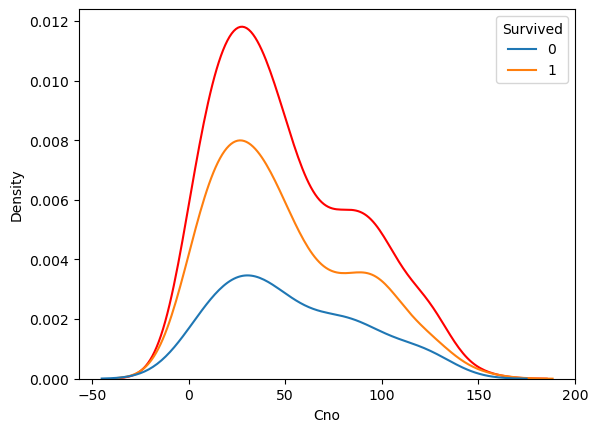

In [13]:
sns.kdeplot(data[data.isna()==False] , x = "Cno", color = "red")
sns.kdeplot(data[data.isna()==False] , x = "Cno" , hue = "Survived")

In [15]:
import matplotlib.pyplot as plt

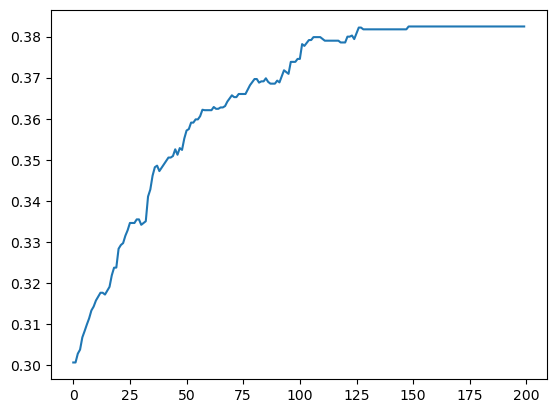

In [41]:
data2 = data.fillna(0)
plt.plot([x for x in range(200)] , [data2[data2["Cno"]<=x]["Survived"].mean() for x in range(200)])

In [26]:
data["Survived"].mean()

0.38245219347581555

In [30]:
data[data["Cno"].isna()==True]["Survived"].mean()

0.30071942446043165

In [31]:
data[data["Cno"].isna()==False]["Survived"].mean()

0.6752577319587629

In [32]:
data["Cno2"] = data["Cno"].isna().astype(int)

In [34]:
data["Cno"].min()

2.0

In [36]:
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Cabin_Type      0
Cno           695
Below 10        0
Above 65        0
Fare2           0
Embarked_C      0
Embarked_S      0
Cno2            0
dtype: int64

In [43]:
data.drop("Cno" , axis = 1 , inplace = True)

In [50]:
data

,Survived,Pclass,Sex,SibSp,Parch,Cabin_Type,Below 10,Above 65,Fare2,Embarked_C,Embarked_S
0,0,3,1,1,0,1,0,0,-0.499958,0,0
1,1,1,0,1,0,0,0,0,0.788503,1,0
2,1,3,0,0,0,1,0,0,-0.486376,0,0
3,1,1,0,1,0,0,0,0,0.422623,0,0
4,0,3,1,0,0,1,0,0,-0.483861,0,0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,0,0,1,0,0,-0.384258,0,0
885,1,1,0,0,0,0,0,0,-0.042189,0,0
886,0,3,0,1,2,1,0,0,-0.173986,0,0
887,1,1,1,0,0,0,0,0,-0.042189,1,0


In [53]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Cabin_Type    0
Below 10      0
Above 65      0
Fare2         0
Embarked_C    0
Embarked_S    0
dtype: int64

In [54]:
data.to_csv("training_final.csv" , index= False)

In [55]:
data[data["Sex"]==1]["Survived"].mean()

0.18890814558058924

In [56]:
data[data["Sex"]==0]["Survived"].mean()

0.7403846153846154